In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima

In [2]:
df=pd.read_csv("zomato_stock_data.csv",index_col='Date',parse_dates=True)
df.head()

C:\Users\Prerana Walvekar\AppData\Local\Temp\ipykernel_21296\1388820772.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df=pd.read_csv("zomato_stock_data.csv",index_col='Date',parse_dates=True)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 698 entries, 2021-07-23 to 2024-05-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       698 non-null    float64
 1   High       698 non-null    float64
 2   Low        698 non-null    float64
 3   Close      698 non-null    float64
 4   Adj Close  698 non-null    float64
 5   Volume     698 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 38.2 KB


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,698.000000,698.000000,698.000000,698.000000,698.000000,6.980000e+02
mean,98.334384,100.335100,96.009026,98.047851,98.047851,6.630727e+07
std,40.592932,41.323650,39.612367,40.518441,40.518441,7.209595e+07
min,40.849998,44.400002,40.599998,41.650002,41.650002,0.000000e+00
25%,63.062499,64.224998,62.000000,62.887498,62.887498,2.981124e+07
50%,83.599998,85.549999,82.200001,83.900002,83.900002,4.708161e+07
75%,133.637497,135.687500,131.225002,133.250004,133.250004,7.465835e+07
max,205.800003,207.199997,194.500000,201.300003,201.300003,6.948953e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 698 entries, 2021-07-23 to 2024-05-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       698 non-null    float64
 1   High       698 non-null    float64
 2   Low        698 non-null    float64
 3   Close      698 non-null    float64
 4   Adj Close  698 non-null    float64
 5   Volume     698 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 38.2 KB


In [51]:
#df['Date']=pd.to_datetime(df['Date'])
#df.set_index('Date',inplace=True)


In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


Stock price Progression

<Axes: xlabel='Date'>

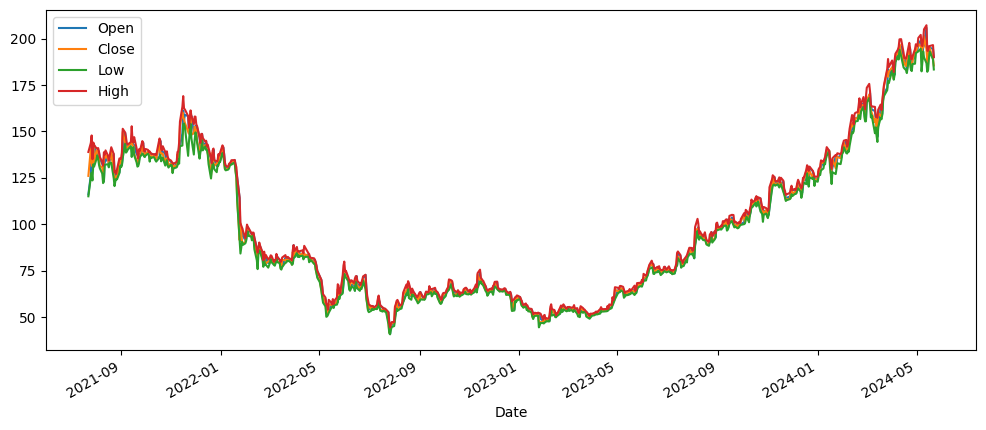

In [10]:
# #plot
# fig = px.line(df, x = 'Date', y=df.columns[1:-2])
# fig.show()

# #stock price progession
# fig.update_layout(
#     title="Stock Price Progression Over Time",
#     xaxis_title="Date",
#     yaxis_title="Stock Price"
# )

 
# #change the format to date time
# df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
# print(df["Date"])

df[['Open','Close','Low','High']].plot(figsize=(12,5))


PLOTING FOR CLOSING VALUES

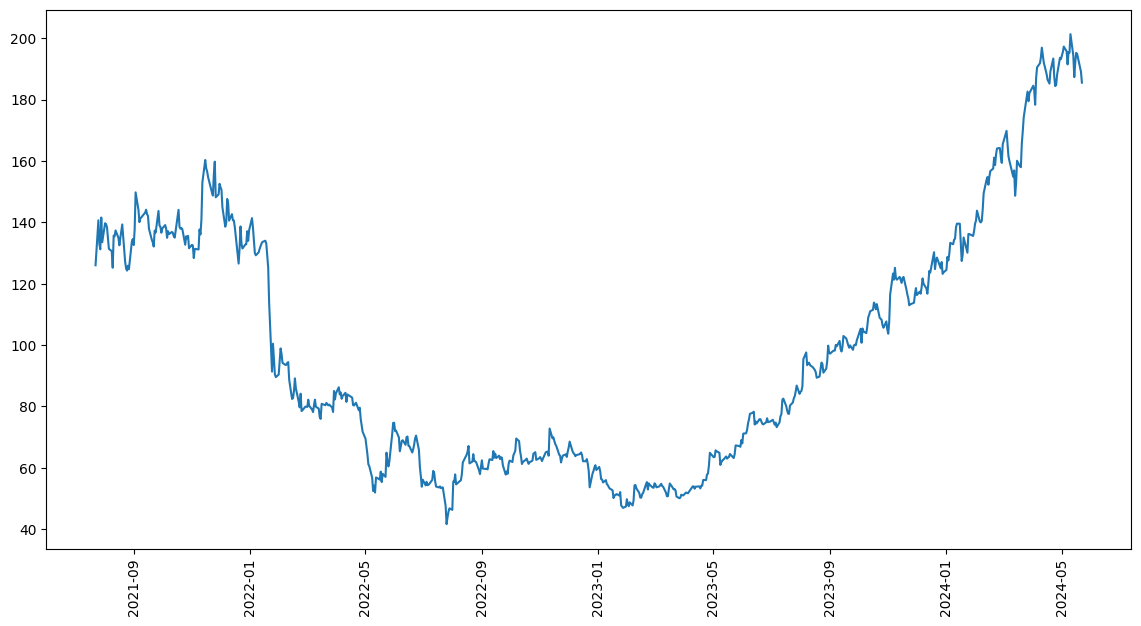

In [70]:
y = df["Close"]
x = df["Date"]

plt.figure(figsize=(14, 7))
plt.plot(x, y)

plt.xticks(rotation = 90)
plt.show()

PLOTING FOR OPENING VALUES


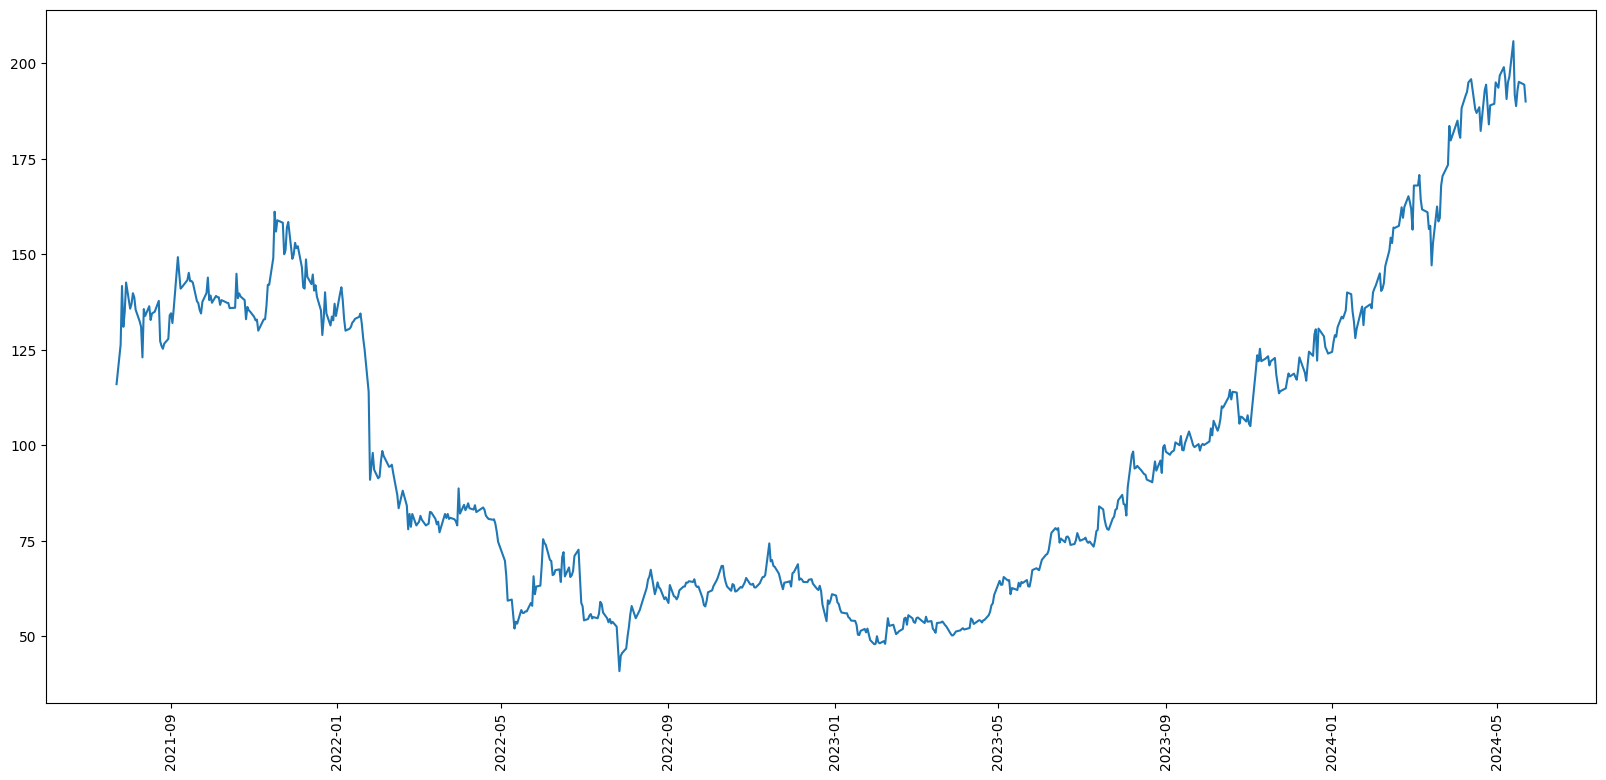

In [71]:
y = df["Open"]
x = df["Date"]

plt.figure(figsize=(20, 9))
plt.plot(x, y)
#plt.xlabel("Date")
#plt.ylabel("Opening Prices")
plt.xticks(rotation = 90)
plt.show()

PLOTING FOR LOW PRICES

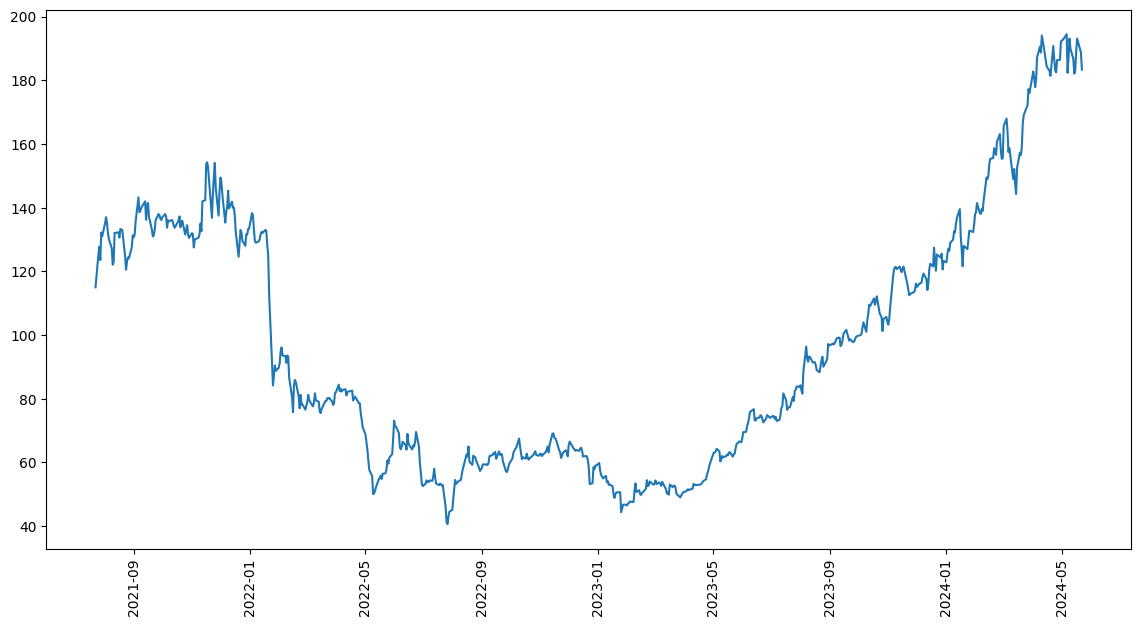

In [72]:
y = df["Low"]
x = df["Date"]
plt.figure(figsize=(14,7))
plt.plot(x,y)
#plt.xlabel('DATE')
#plt.ylabel('Low Prices')
plt.xticks(rotation=90)
plt.show()

PLOTING FOR HIGH PRICES

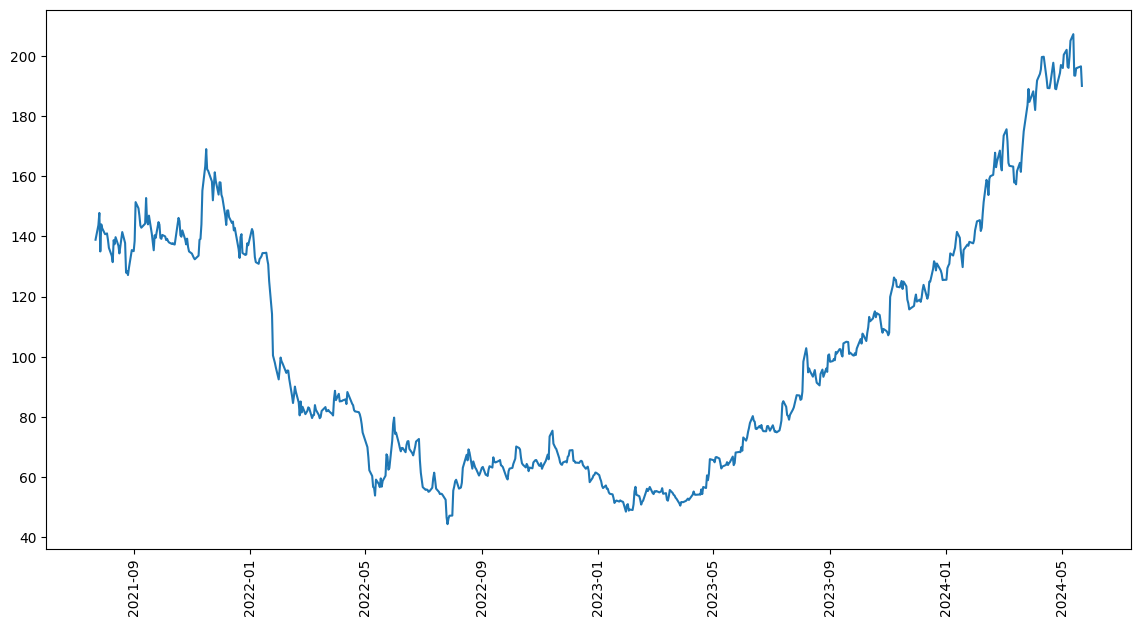

In [73]:
y = df['High']
x= df['Date']
plt.figure(figsize=(14,7))
plt.plot(x,y)
plt.xticks(rotation=90)
plt.show()

TIME SERIEAL PLOT

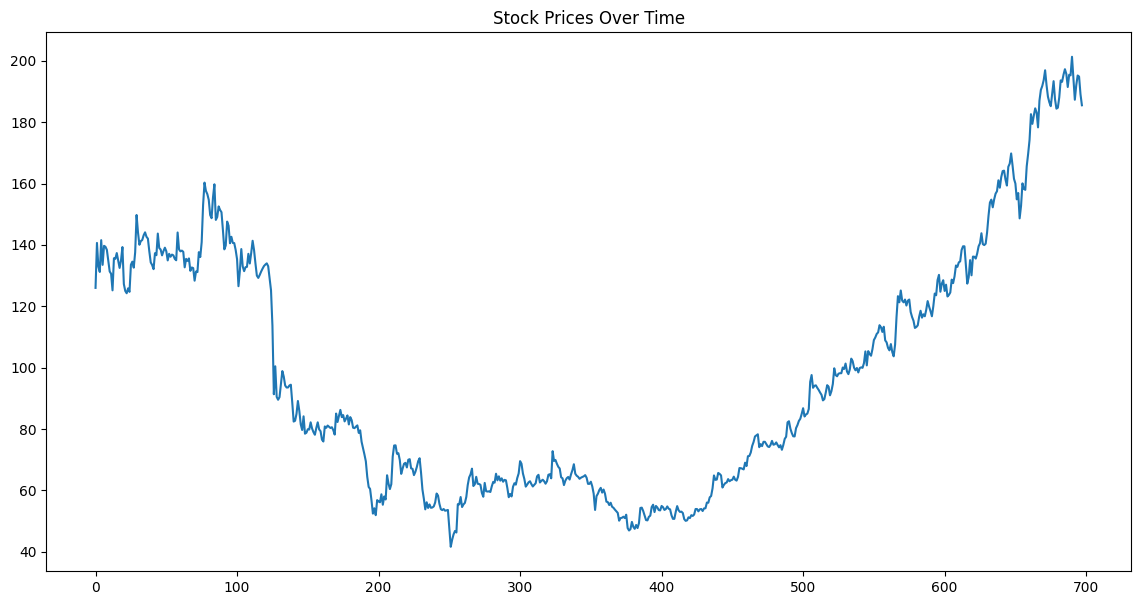

In [74]:
y= df['Close']
x = df['Date']
plt.figure(figsize=(14,7))
plt.plot(df.index, df['Close'])
plt.title('Stock Prices Over Time')
##plt.xlabel('Date')
#plt.ylabel('Price')
plt.show()

PLOTING FOR MOVING AVERAGE

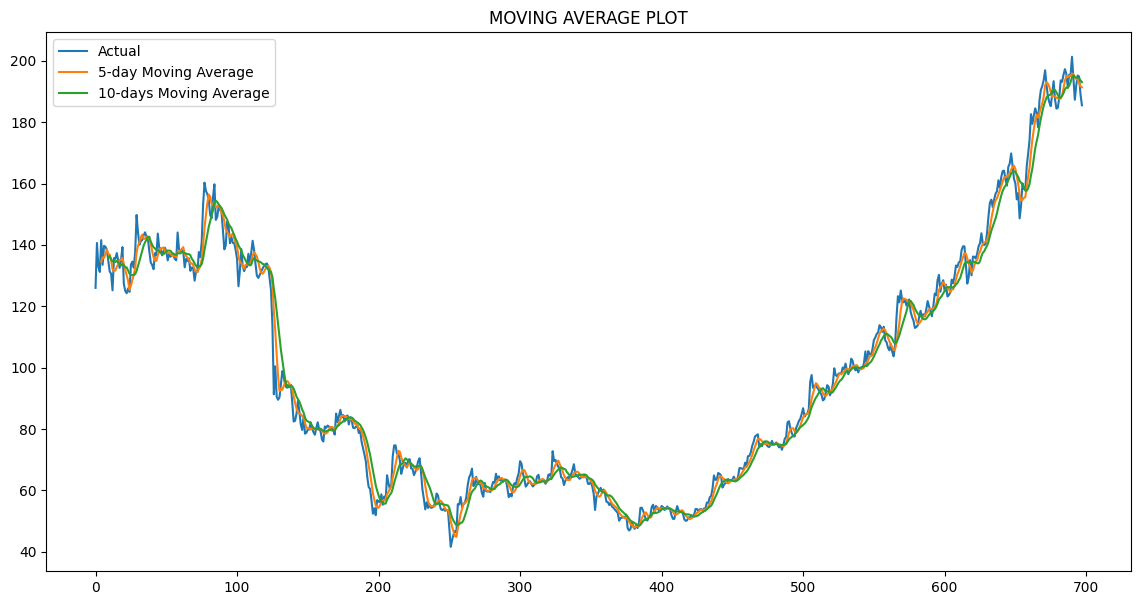

In [146]:
 #moving avrg
plt.figure(figsize=(14,7))
plt.plot(df.index, df['Close'], label='Actual')
plt.plot(df.index, df['Close'].rolling(window=5).mean(), label ='5-day Moving Average')
plt.plot(df.index, df['Close'].rolling(window=10).mean(), label ='10-days Moving Average')
plt.title('MOVING AVERAGE PLOT')
#plt.xlabel('DATE')
#plt.ylabel('PRICE')
plt.legend()
plt.show()



ADF Statistic: -0.055582613945341294
p-value: 0.9536868667248083


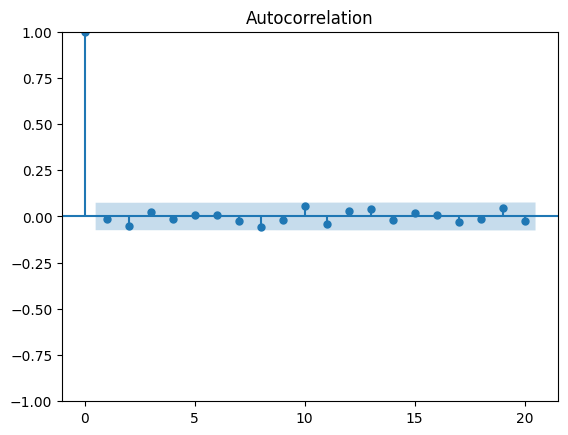

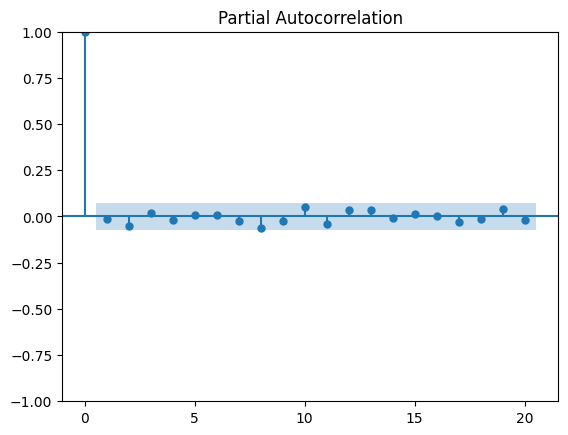

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1805.591
Date:                Fri, 13 Dec 2024   AIC                           3617.183
Time:                        13:04:38   BIC                           3630.823
Sample:                             0   HQIC                          3622.457
                                - 698                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7198      0.505     -1.425      0.154      -1.710       0.271
ma.L1          0.7397      0.496      1.490      0.136      -0.233       1.713
sigma2        10.4139      0.310     33.625      0.0

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



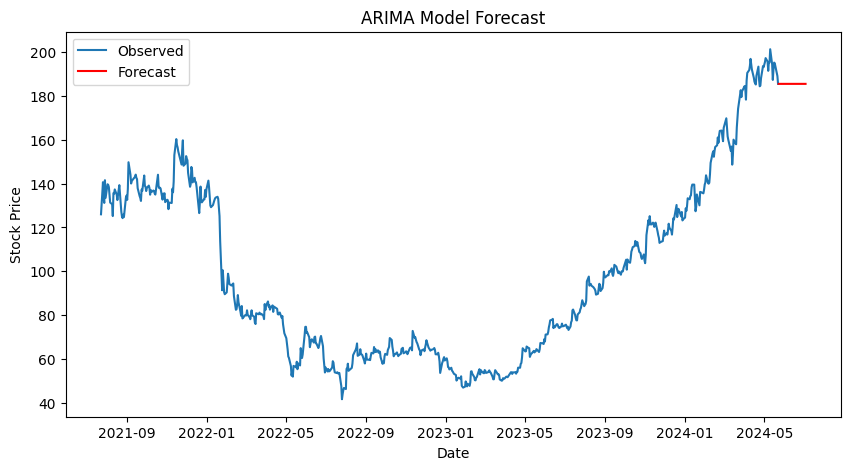

In [84]:
# Step 1: Load and prepare the data
# Assuming df is your DataFrame with 'Date' and 'Close' columns
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # Ensure correct datetime format
df.set_index('Date', inplace=True)

# Step 2: Check stationarity using ADF test
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

# Check stationarity of 'Close' column
check_stationarity(df['Close'])

# If p-value > 0.05, the series is non-stationary and we need to difference it
df['Close_diff'] = df['Close'].diff().dropna()  # First differencing

# Step 3: Check ACF and PACF to determine AR and MA terms
# Plot ACF and PACF for the differenced data
plot_acf(df['Close_diff'].dropna(), lags=20)
plt.show()

plot_pacf(df['Close_diff'].dropna(), lags=20)
plt.show()

# Step 4: Fit the ARIMA model
# Example ARIMA(p, d, q) where:
# p = 1 (from PACF), d = 1 (for differencing), q = 1 (from ACF)
model = ARIMA(df['Close'], order=(1, 1, 1))  # Adjust the order (p, d, q) as needed
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

# Step 5: Make Predictions
# Forecasting for the next 30 days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Create a forecasted index (next 30 days)
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

# Step 6: Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Observed')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Step 7: Evaluate the model (if you have a test set)
# For evaluation, you can calculate the Mean Squared Error (MSE) or other metrics
# Assuming you have a test set (df_test), you can evaluate as follows:
# predictions = model_fit.predict(start=len(df_train), end=len(df_train) + len(df_test) - 1)
# mse = mean_squared_error(df_test['Close'], predictions)
# print(f'Mean Squared Error: {mse}')


In [88]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [89]:
adf_test(df['Close'])

ADF Statistics: -0.055582613945341294
p- value: 0.9536868667248083
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [90]:
df['First Difference']=df['Close']-df['Close'].shift(1)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,First Difference
0,23-07-2021,116.000000,138.899994,115.000000,126.000000,126.000000,694895290,NaN
1,26-07-2021,126.349998,143.750000,125.300003,140.649994,140.649994,249723854,14.649994
2,27-07-2021,141.699997,147.800003,127.750000,132.899994,132.899994,240341900,-7.750000
3,28-07-2021,131.000000,135.000000,123.550003,131.199997,131.199997,159793731,-1.699997
4,29-07-2021,134.949997,144.000000,132.199997,141.550003,141.550003,117973089,10.350006


In [91]:
df.isnull().sum()

Date                0
Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
First Difference    1
dtype: int64

In [92]:
adf_test(df['First Difference'].dropna())

ADF Statistics: -27.05623212942083
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<Axes: >

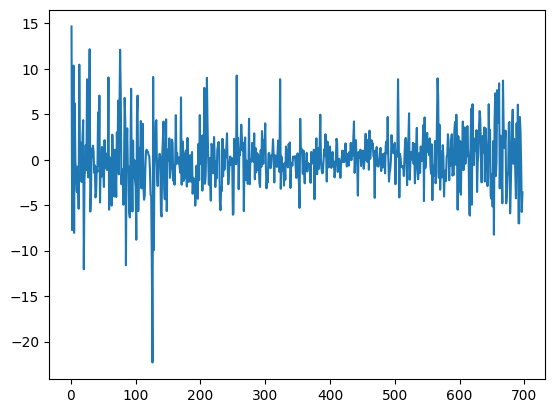

In [93]:
df['First Difference'].plot()

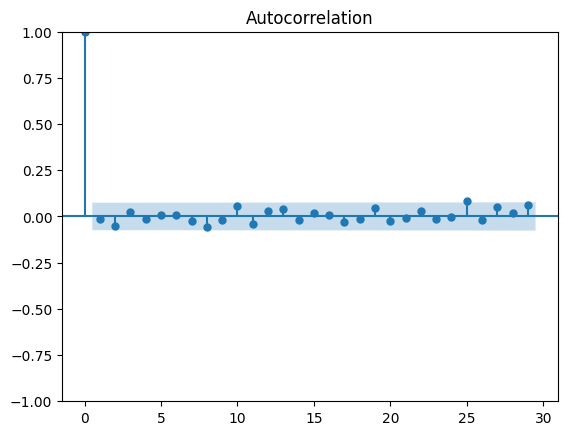

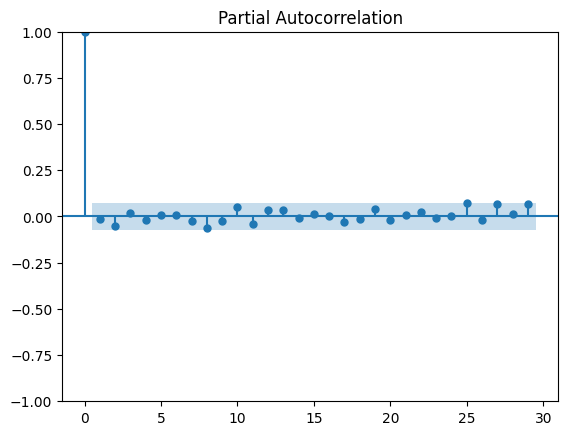

In [94]:
acf = plot_acf(df["First Difference"].dropna())
pacf = plot_pacf(df["First Difference"].dropna())

In [154]:
# from pmdarima import auto_arima
# auto = auto_arima

In [95]:
model_ARIMA=ARIMA(df['Close'],order=(5,2,1))

In [96]:
model_Arima_fit=model_ARIMA.fit()

In [97]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  698
Model:                 ARIMA(5, 2, 1)   Log Likelihood               -1803.602
Date:                Fri, 13 Dec 2024   AIC                           3621.204
Time:                        13:07:11   BIC                           3653.021
Sample:                             0   HQIC                          3633.506
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0219      0.024     -0.929      0.353      -0.068       0.024
ar.L2         -0.0655      0.029     -2.239      0.025      -0.123      -0.008
ar.L3          0.0126      0.037      0.344      0.731      -0.059       0.084
ar.L4         -0.0285      0.034     -0.836      0.403      -0.095       0.038
ar.L5         -0.0027      0.033     -0.081      0.936      -0.068       0.063
ma.L1         -0.9914      0.007   -146.745      0.000      -1.005      -0.978
sigma2        10.3681      0.325     31.876      0.000       9.731      11.006
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):               903.26
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [98]:
df_close = df[['Date','Close']]
df_close.head()

,Date,Close
0,23-07-2021,126.000000
1,26-07-2021,140.649994
2,27-07-2021,132.899994
3,28-07-2021,131.199997
4,29-07-2021,141.550003


In [159]:
df.set_index(['Date'],inplace=True)

In [160]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,First Difference
Date,,,,,,,
2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290,NaN
2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854,14.649994
2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900,-7.750000
2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731,-1.699997
2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089,10.350006


<Axes: xlabel='Date'>

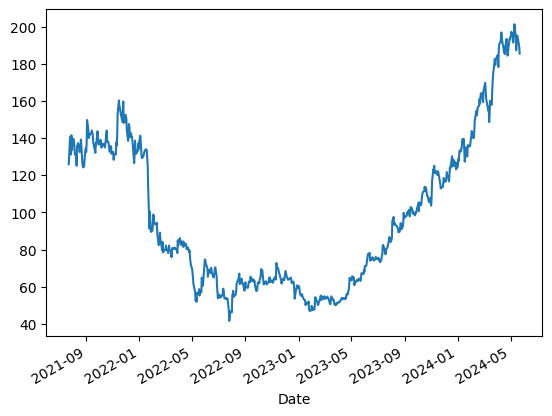

In [161]:
df['Close'].plot()

In [164]:
step = auto_arima(df['First Difference'].dropna(),trace=True,suppress_warnings=True)

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprec

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=1.66 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=4089.563, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=3914.481, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=3813.444, Time=0.03 sec


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprec

 ARIMA(3,2,0)(0,0,0)[0]             : AIC=3773.387, Time=0.10 sec


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(4,2,0)(0,0,0)[0]             : AIC=3743.657, Time=0.90 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=3722.993, Time=0.19 sec


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=0.72 sec


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.38 sec


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=3724.958, Time=0.93 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 5.018 seconds


In [165]:
df

,Open,High,Low,Close,Adj Close,Volume,First Difference
Date,,,,,,,
2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290,NaN
2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854,14.649994
2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900,-7.750000
2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731,-1.699997
2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089,10.350006
...,...,...,...,...,...,...,...
2024-05-15,188.800003,193.399994,183.149994,192.000000,192.000000,44772997,4.699997
2024-05-16,192.899994,195.850006,189.000000,195.199997,195.199997,35478593,3.199997
2024-05-17,195.149994,196.000000,193.100006,194.850006,194.850006,20841351,-0.349991


<Axes: xlabel='Date'>

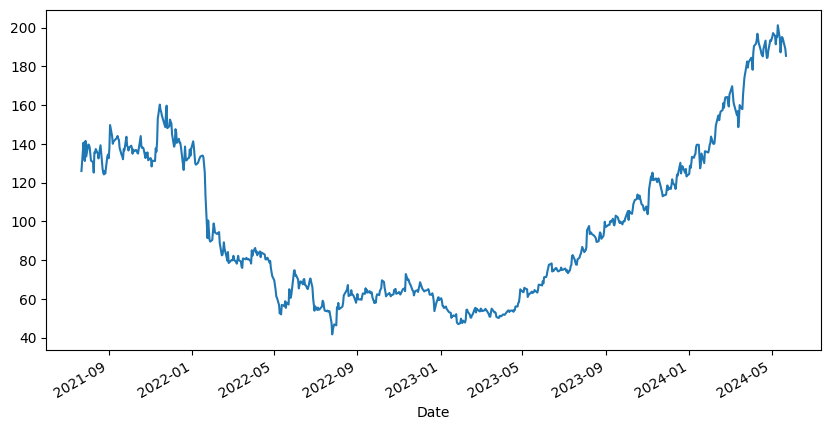

In [ ]:
df['Close'].plot(figsize=(10,5))

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'df' is your dataframe with 'Date' as index and 'Close' as the target column

# Convert 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # Adjust the format as needed
df.set_index('Date', inplace=True)

# Fit the ARIMA model on the entire dataset (using historical data for training)
# Specify (p, d, q) - for simplicity, let's use (1, 1, 1), but you can tune this based on your analysis
model = ARIMA(df['Close'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 45 days (business days)
forecast = model_fit.get_forecast(steps=15)

# Generate a forecast index starting from the last date in the dataframe, covering the next 45 business days
forecast_index = pd.date_range(start=df.index[-1], periods=16, freq='B')[1:]

# Extract forecasted values and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot both the historical data and the forecasted data
plt.figure(figsize=(15, 5))

# Plot the historical data (the 'Close' prices)
plt.plot(df.index, df['Close'], label='Historical Data', color='blue')

# Plot the forecasted values (future predictions)
plt.plot(forecast_index, forecast_mean, label='Forecasted Data', color='red')

# Fill the confidence interval (shaded region)
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)

# Add titles and labels
plt.title('Historical and Forecasted Stock Prices (ARIMA Model)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()


KeyError: 'Date'

AUTOCORRELATION PLOTTING

In [163]:
#ACF
plt.figure(figsize=(14,7))
plot_acf(df['first differencing'], lags=20)
plt.title('Autocorrelation Function ACF plot')
plt.show()

KeyError: 'first differencing'

<Figure size 1400x700 with 0 Axes>

Partial Autocorrelation Function (PACF) Plot

<Figure size 1000x600 with 0 Axes>

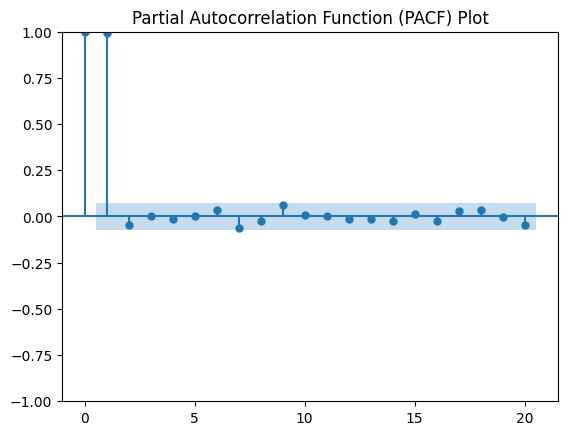

In [15]:
plt.figure(figsize=(10,6))
plot_pacf(df['Close'], lags=20)
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.show()

PLOTTING FOR START_DATE TO END_DATE

In [12]:

# Define the start and end dates for filtering
start_date = ' 2023-08-01'  # Change this to your desired start date
end_date = '2023-08-15'     # Change this to your desired end date

# Filter the data for the specified date range
filtered_data = df.loc[start_date:end_date]

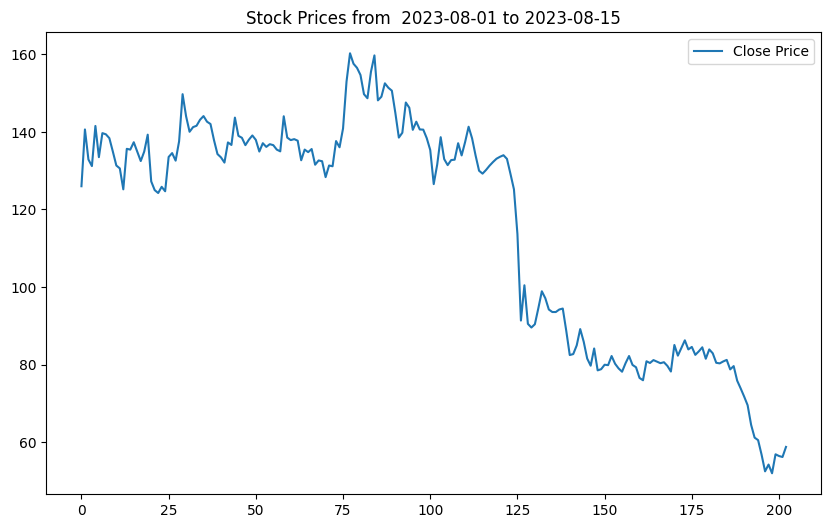

In [13]:
# Plot 1: Time Series Plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['Close'], label='Close Price')
plt.title('Stock Prices from {} to {}'.format(start_date, end_date))
#plt.xlabel('Date')
#plt.ylabel('Price')
plt.legend()
plt.show()

model = ARIMA(filtered_data['Close'], order=(5, 1, 0))
model_fit = model.fit()


plot_pcf(returns, method='ywm')
plt.show


sample 